# Pymaceuticals Inc.
---

### Analysis

#Overview

#Merging two data frames allowed for a more in-depth analysis of the data and allowed duplicate mice to be removed as to not skew the results. Out of all the drugs prescribed, Ramicane provided the best data with the lowest variability and has the greatest confidence interval. Capimulin had the highest amount of recorded time points which gave the largest amount of data. This drug was explored further and showed that in mouse id i509, tumor volume decreased from 45 mm3 to 41mm3 in 45 days. 

#Majority of the mice sex were male at 51% and out of the selected 4 drug treatments, Capomulin, Ramicane, Infubinol and Ceftamin, only Infubinol was found to have a potential outlier in the data. The correlation coefficent between mass of the mouse in grams vs tumor volume and this correlation was found to be strong at 0.83, yeilding a linear regression of y=0.96x+21.49.
 

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy import stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data = pd.merge(mouse_metadata, study_results, how='right')
mouse_data = mouse_data[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites", "Drug Regimen", "Sex", "Age_months", "Weight (g)"]]
# Display the data table for preview
mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
unique_mouse_count = len(mouse_data['Mouse ID'].unique())
print(unique_mouse_count)
mouse_data.tail()

249


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30
1892,b879,45,72.555239,2,Stelasyn,Female,4,26


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


array(['g989'], dtype=object)

In [3]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_rows = mouse_data[mouse_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_rows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_id_remove = 'g989'
mouse_data_cleaned = mouse_data[mouse_data['Mouse ID'] !=mouse_id_remove]
mouse_data_cleaned.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
# Checking the number of mice in the clean DataFrame.
unique_mouse_count = len(mouse_data_cleaned['Mouse ID'].unique())
print(unique_mouse_count)



248


## Summary Statistics

In [6]:
#Create a series where by tumor volume can be manipulated to give results per drug.

# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor_volume_mean = mouse_data_cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tumor_volume_median = mouse_data_cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_volume_var = mouse_data_cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumor_volume_std = mouse_data_cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumor_volume_sem = mouse_data_cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
tumor_summary = pd.DataFrame({'mean': tumor_volume_mean, 'median': tumor_volume_median, 'var': tumor_volume_var, 'std': tumor_volume_std, 'sem': tumor_volume_sem})
tumor_summary.columns.name = 'Tumor Volume (mm3)'
tumor_summary


Tumor Volume (mm3),mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

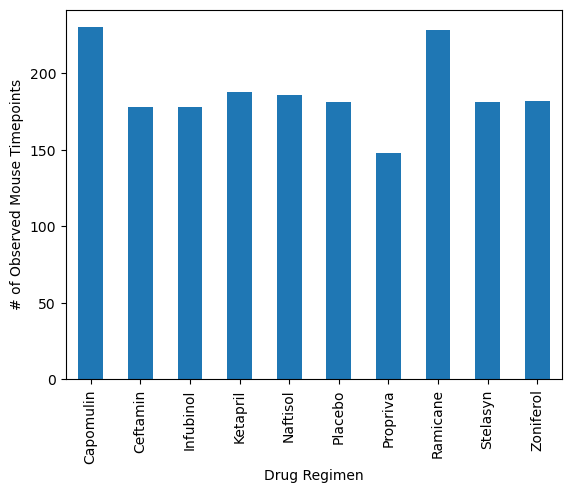

In [7]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

count_time_points = mouse_data_cleaned.groupby('Drug Regimen')['Timepoint'].count()
count_time_points.plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()


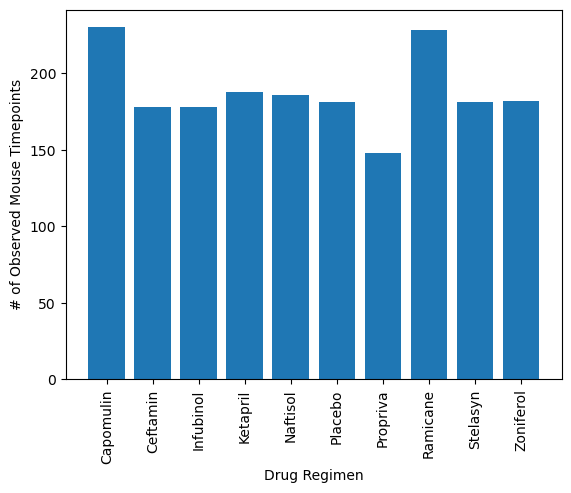

In [8]:
x = count_time_points.index
y = count_time_points.values
plt.bar(x, y)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

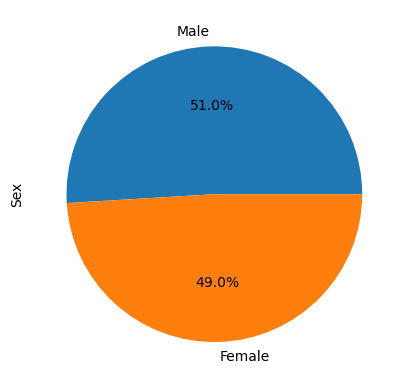

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_counts = mouse_data_cleaned['Sex'].value_counts()
sex_counts.plot(kind = 'pie', autopct = '%1.1f%%')
plt.ylabel('Sex')
plt.show()



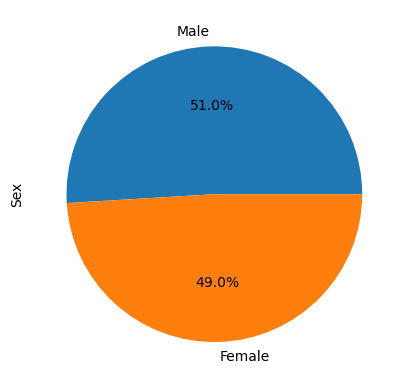

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
values = sex_counts.values
labels = sex_counts.index

plt.pie(values, labels=labels, autopct = '%1.1f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [11]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = mouse_data_cleaned.groupby('Mouse ID')['Timepoint'].last().reset_index()
print(last_timepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_vol = pd.merge(mouse_data_cleaned, last_timepoint, how='right')
final_tumor_vol.head()

    Mouse ID  Timepoint
0       a203         45
1       a251         45
2       a262         45
3       a275         45
4       a366         30
..       ...        ...
243     z435         10
244     z578         45
245     z581         45
246     z795         45
247     z969         45

[248 rows x 2 columns]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [12]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty dict to fill with tumor vol data (for plotting)
outliers = {}
tumor_volume_data = {treatment: [] for treatment in treatments}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

#iterating over each treatment in the treatments list
for treatment in treatments:

    #finding where 
    treatment_df = final_tumor_vol[final_tumor_vol['Drug Regimen']==treatment]

    #calculating my quartiles Q1 and Q3 
    quartiles = treatment_df['Tumor Volume (mm3)'].quantile([0.25, 0.75])
    Q1 = quartiles[0.25]
    Q3 = quartiles[0.75]

    #calculating my IQR
    IQR = Q3 - Q1

    #calculate my upper and lower bound
    upper_bound = Q3 + 1.5*IQR
    lower_bound = Q1 - 1.5*IQR


    #finding my outliers 
    outliers_df = treatment_df[(treatment_df['Tumor Volume (mm3)']<lower_bound) | (treatment_df['Tumor Volume (mm3)']>upper_bound)]
    
    #store my outliers results in the dict
    outliers[treatment] = {'IQR':IQR, 'Outliers':outliers_df['Tumor Volume (mm3)'].tolist()}

    #add tumor volume data to my list
    tumor_volume_data[treatment].extend(treatment_df['Tumor Volume (mm3)'].tolist())

#printing results for each outlier in 
for treatment, data in outliers.items():
    print(f"{treatment} potentail outliers {data['Outliers']}")

Capomulin potentail outliers []
Ramicane potentail outliers []
Infubinol potentail outliers [36.3213458]
Ceftamin potentail outliers []


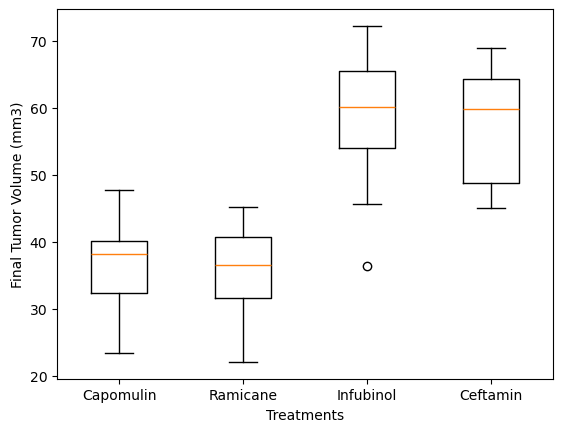

In [13]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volume_data.values(), labels=tumor_volume_data.keys())
plt.xlabel('Treatments')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

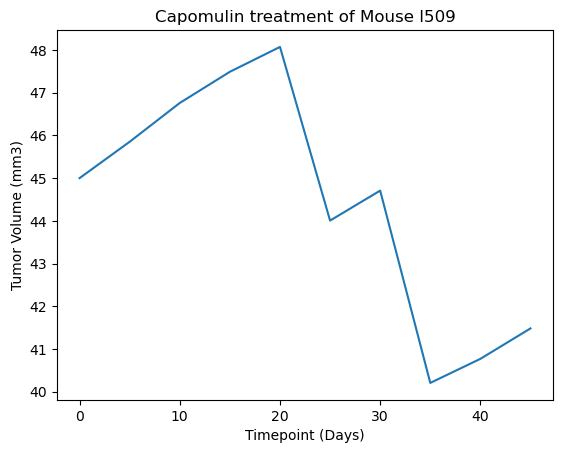

In [14]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_i509_df = mouse_data_cleaned[mouse_data_cleaned['Mouse ID']=='l509']
plt.plot(mouse_i509_df['Timepoint'], mouse_i509_df['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of Mouse l509')
plt.show()




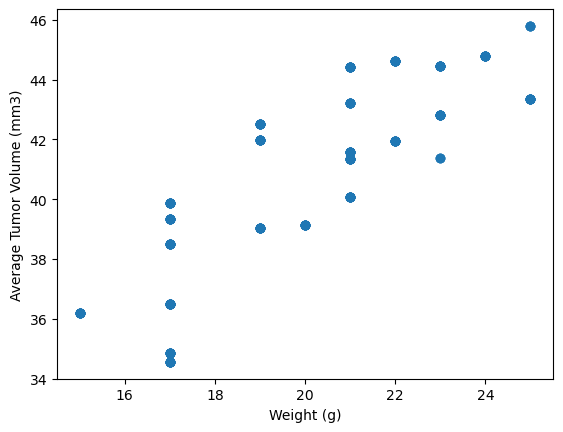

In [15]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#creating a dataframe with just Capomulin
capomulin_df = mouse_data_cleaned[mouse_data_cleaned['Drug Regimen']=='Capomulin']
#get the average tumor volume from filtered data frame using groupby, returning the original index
average_tumor_vol = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
#Merging the two dataframes on the mouse id, keeping the mouse id and weight
merged_df = pd.merge(average_tumor_vol, capomulin_df[['Mouse ID', 'Weight (g)']], how='left', on='Mouse ID')
x_values = merged_df['Weight (g)']
y_values = merged_df['Tumor Volume (mm3)']
plt.scatter(x_values, y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and tumor volume is 0.83
The linear regression equation was y=0.96x+21.49


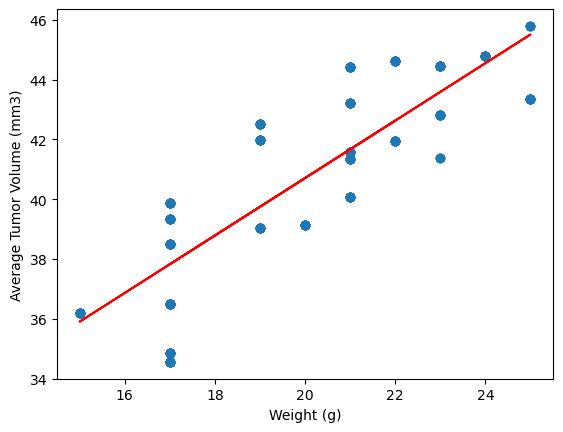

In [23]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen



#performing a linear regression on Mouse Weight(g) vs Average Tumor Vol (mm3)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#getting regression values
regress_values = slope*x_values + intercept

#create the line eqn
line_eq = "y="+ str(round(slope,2)) + "x+" + str(round(intercept,2))

#finding correlation coefficient 
corellation_coeff = x_values.corr(y_values)
print(f"The correlation between mouse weight and tumor volume is {round(corellation_coeff,2)}")
print(f"The linear regression equation was {line_eq}")
# Create Plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Label plot and annotate the line equation
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.annotate(line_eq, (20,15), fontsize=15, color='red')
plt.show()